## Favorite Coffee Predictive Model

Goal: Build a model that predicts which of four coffee samples a person would like. Identify features that could be included in a survey

### Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn import tree
import scipy.stats as st
from sklearn.preprocessing import OneHotEncoder

### Data Pull

In [6]:
coffee_df = pd.read_csv("GACTT_RESULTS_ANONYMIZED.csv")
coffee_df.head()

,Submission ID,Respondent ID,Submitted at,What is your age?,What is your ZIP code?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),...,Gender,Gender (please specify),Marital Status,Household Income,Education Level,Ethnicity/Race,Ethnicity/Race (please specify),Employment Status,Number of Children,Political Affiliation
0,gMR29l,vDzkBA,9/11/23 20:50,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,9Z4VME,9/11/23 20:52,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,XoNLQj,9/12/23 1:33,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,Gp7gde,9/12/23 12:58,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,Bp9ogQ,9/12/23 15:24,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

In [8]:
# select columns that may be good predictors
good_cols = {
    "What is your age?":  'age',
    "How many cups of coffee do you typically drink per day?": 'typical_cups_per_day',
    "Where do you typically drink coffee?": 'typical_drink_location',
    "What is your favorite coffee drink?": 'favorite_drink',
    "Do you usually add anything to your coffee?": 'usual_additions',
    "Before today's tasting, which of the following best described what kind of coffee you like?": 'liked_coffee_kind',
    "How strong do you like your coffee?": 'preffered_strength',
    "What roast level of coffee do you prefer?": 'preffered_roast',
    "How much caffeine do you like in your coffee?": 'preffered_caffeine',
    "In total, much money do you typically spend on coffee in a month?": 'monthly_expense',
    "Why do you drink coffee?": 'why_drink',
    "Do you like the taste of coffee?": 'like_taste',
    "Do you know where your coffee comes from?": 'know_orgin',
    "What is the most you've ever paid for a cup of coffee?": 'most_paid',
    "What is the most you'd ever be willing to pay for a cup of coffee?": 'most_willing_pay',
    "Do you feel like you’re getting good value for your money when you buy coffee at a cafe?": 'cafe_feel_good_value',
    "Approximately how much have you spent on coffee equipment in the past 5 years?": 'equipment_expense_5_years',
    "Do you feel like you’re getting good value for your money with regards to your coffee equipment?": 'equipment_feel_good_value',
    
    "Lastly, what was your favorite overall coffee?": 'taste_test_favorite'
}

# get subset of useful columns
coffee_df = coffee_df[good_cols.keys()]

# rename useful columns
coffee_df.columns = good_cols.values()

# remove surveys with missing favorite coffee
coffee_df = coffee_df.query('taste_test_favorite.notna()')

# reset index
coffee_df.reset_index(inplace = True,drop = True)

coffee_df.head()

,age,typical_cups_per_day,typical_drink_location,favorite_drink,usual_additions,liked_coffee_kind,preffered_strength,preffered_roast,preffered_caffeine,monthly_expense,why_drink,like_taste,know_orgin,most_paid,most_willing_pay,cafe_feel_good_value,equipment_expense_5_years,equipment_feel_good_value,taste_test_favorite
0,<18 years old,3,"At home, At the office, At a cafe",Pourover,"No - just black, Milk, dairy alternative, or c...",Bright,Medium,Light,Full caffeine,>$100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee B
1,>65 years old,3,"At the office, At a cafe",Cortado,No - just black,Fruity,Somewhat strong,Blonde,Full caffeine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee D
2,25-34 years old,1,"At home, At the office, On the go",Regular drip coffee,"Milk, dairy alternative, or coffee creamer, Su...",Sweet,Somewhat strong,Medium,Full caffeine,$40-$60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee B
3,18-24 years old,2,At the office,Iced coffee,"Milk, dairy alternative, or coffee creamer",Nutty,Somewhat strong,Nordic,Full caffeine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee A
4,45-54 years old,2,"At home, At the office, At a cafe, On the go",Regular drip coffee,No - just black,Floral,Medium,Light,Full caffeine,$20-$40,It tastes good,Yes,Yes,$4-$6,$8-$10,No,$500-$1000,Yes,Coffee B


### Data Analysis

Text(0.5, 1.0, 'Distribution of Taste Test Favorite')

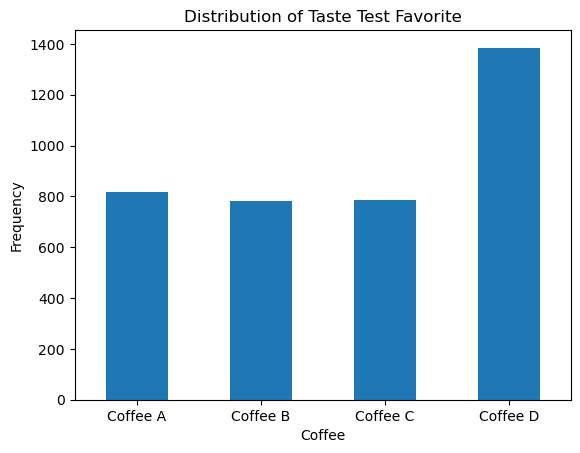

In [10]:
## Plot distribution of favorite coffees
coffee_df.taste_test_favorite.value_counts()[['Coffee A','Coffee B','Coffee C','Coffee D']].plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Coffee')
plt.ylabel('Frequency')
plt.title('Distribution of Taste Test Favorite')

(0.0, 1.0)

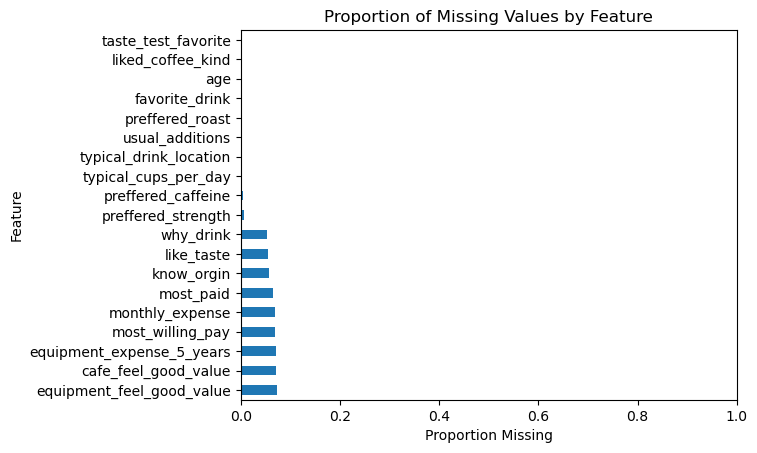

In [11]:
## Plot proportion of missing values
pd.isnull(coffee_df).mean().sort_values(ascending = False).plot(kind = 'barh',
                                                                title = 'Proportion of Missing Values by Feature',
                                                                xlabel = 'Proportion Missing',
                                                                ylabel = 'Feature'
                                                               )
plt.xlim(0,1)

<Axes: title={'center': 'Chi Squared Tests P Values'}, xlabel='P Value', ylabel='Feature'>

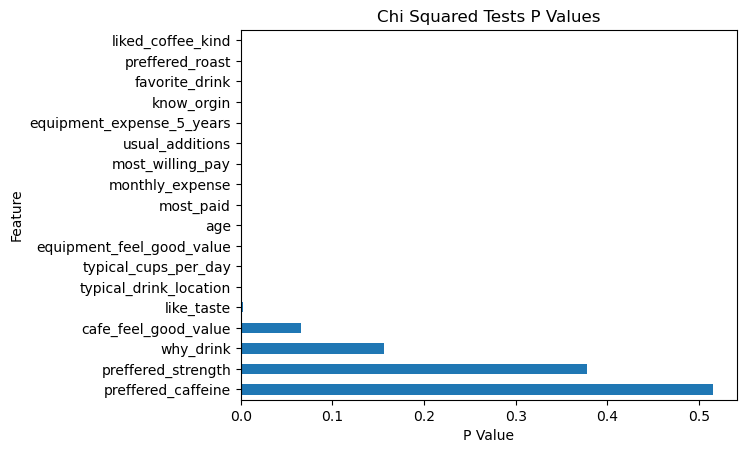

In [12]:
## Perform chi squared test
chisquare_p_vals = {}

for col in coffee_df.drop('taste_test_favorite',axis=1).columns:
    chisquare_p_vals[col] = st.chi2_contingency(pd.crosstab(coffee_df[col], coffee_df.taste_test_favorite, dropna = False)).pvalue
    
chisquare_p_vals = pd.DataFrame(chisquare_p_vals.values(), index = chisquare_p_vals.keys())

chisquare_p_vals.sort_values(by=0,ascending=False).plot(kind = 'barh',
                                       title = 'Chi Squared Tests P Values',
                                       ylabel = 'Feature',
                                       xlabel = 'P Value',
                                       legend = False)

## One Hot Encode

In [14]:
## specify ordinal and categorical columns
ordinal_cols = ['age','typical_cups_per_day','preffered_strength','preffered_caffeine','monthly_expense','most_paid','most_willing_pay','equipment_expense_5_years']
cat_cols = coffee_df.drop( np.append(ordinal_cols,'taste_test_favorite'), axis = 1).columns

In [15]:
## map ordinal columns to 0-n
ordinal_cols_map = {
    'age': ['<18 years old','18-24 years old','25-34 years old','35-44 years old','45-54 years old','55-64 years old','>65 years old'],
    'typical_cups_per_day': [np.nan, 'Less than 1', '1', '2','3','4','More than 4'],
    'preffered_strength': [np.nan, 'Weak','Somewhat light','Medium','Somewhat strong','Very strong'],
    'preffered_caffeine': [np.nan,'Decaf','Half caff','Full caffeine'],
    'monthly_expense': [np.nan, '<$20','$20-$40','$40-$60','$60-$80','$80-$100','>$100'],
    'most_paid': [np.nan, 'Less than $2','$2-$4','$4-$6','$6-$8','$8-$10','$10-$15','$15-$20','More than $20'],
    'most_willing_pay': [np.nan, 'Less than $2','$2-$4','$4-$6','$6-$8','$8-$10','$10-$15','$15-$20','More than $20'],
    'equipment_expense_5_years': [np.nan, 'Less than $20','$20-$50','$50-$100','$100-$300','$300-$500','$500-$1000','More than $1,000']   
}

ordinal_coffee_df = coffee_df[ordinal_cols]

for ordinal_col in ordinal_cols_map.keys():
    ordinal_map = dict(zip(ordinal_cols_map[ordinal_col], np.arange(len(ordinal_cols_map[ordinal_col]))))
    ordinal_coffee_df[ordinal_col] = ordinal_coffee_df[ordinal_col].map(ordinal_map)

ordinal_coffee_df.head()

C:\Users\aaron\AppData\Local\Temp\ipykernel_6052\219565338.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_coffee_df[ordinal_col] = ordinal_coffee_df[ordinal_col].map(ordinal_map)
C:\Users\aaron\AppData\Local\Temp\ipykernel_6052\219565338.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal_coffee_df[ordinal_col] = ordinal_coffee_df[ordinal_col].map(ordinal_map)
C:\Users\aaron\AppData\Local\Temp\ipykernel_6052\219565338.py:17: SettingWithCopyWarning: 
A value is trying to be set on a co

,age,typical_cups_per_day,preffered_strength,preffered_caffeine,monthly_expense,most_paid,most_willing_pay,equipment_expense_5_years
0,0,4,3,3,6,0,0,0
1,6,4,4,3,0,0,0,0
2,2,2,4,3,3,0,0,0
3,1,3,4,3,0,0,0,0
4,4,3,3,3,2,3,5,6


In [16]:
## one hot encode categorical features
ohe = OneHotEncoder()
ohe_results = ohe.fit_transform(coffee_df[cat_cols])
coffee_ohe_df = pd.DataFrame(ohe_results.toarray(), columns = ohe.get_feature_names_out())
coffee_ohe_df.head()

,typical_drink_location_At a cafe,"typical_drink_location_At a cafe, At home","typical_drink_location_At a cafe, At home, At the office","typical_drink_location_At a cafe, At home, At the office, On the go","typical_drink_location_At a cafe, At home, On the go","typical_drink_location_At a cafe, At home, On the go, At the office","typical_drink_location_At a cafe, At the office","typical_drink_location_At a cafe, At the office, At home","typical_drink_location_At a cafe, At the office, At home, On the go","typical_drink_location_At a cafe, At the office, On the go",...,like_taste_nan,know_orgin_No,know_orgin_Yes,know_orgin_nan,cafe_feel_good_value_No,cafe_feel_good_value_Yes,cafe_feel_good_value_nan,equipment_feel_good_value_No,equipment_feel_good_value_Yes,equipment_feel_good_value_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [17]:
## merge ordinal, one hot encoded, and target feature 
coffee_df = pd.concat([ordinal_coffee_df, coffee_ohe_df,coffee_df.taste_test_favorite],axis=1)
coffee_df.head()

,age,typical_cups_per_day,preffered_strength,preffered_caffeine,monthly_expense,most_paid,most_willing_pay,equipment_expense_5_years,typical_drink_location_At a cafe,"typical_drink_location_At a cafe, At home",...,know_orgin_No,know_orgin_Yes,know_orgin_nan,cafe_feel_good_value_No,cafe_feel_good_value_Yes,cafe_feel_good_value_nan,equipment_feel_good_value_No,equipment_feel_good_value_Yes,equipment_feel_good_value_nan,taste_test_favorite
0,0,4,3,3,6,0,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Coffee B
1,6,4,4,3,0,0,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Coffee D
2,2,2,4,3,3,0,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Coffee B
3,1,3,4,3,0,0,0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,Coffee A
4,4,3,3,3,2,3,5,6,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Coffee B


## Train/Test Split

In [19]:
## 80/20 train test split
train_df = coffee_df.sample(frac = 0.8)
test_df = coffee_df.drop(train_df.index)

train_x = train_df.drop('taste_test_favorite',axis=1)
train_y = train_df.taste_test_favorite
test_x = test_df.drop('taste_test_favorite',axis=1)
test_y = test_df.taste_test_favorite

print(f"Train Shape: {train_df.shape}")
print(f"Test Shape: {test_df.shape}")

Train Shape: (3016, 253)
Test Shape: (754, 253)


## Baseline

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Coffee A'),
  Text(1, 0, 'Coffee B'),
  Text(2, 0, 'Coffee C'),
  Text(3, 0, 'Coffee D')])

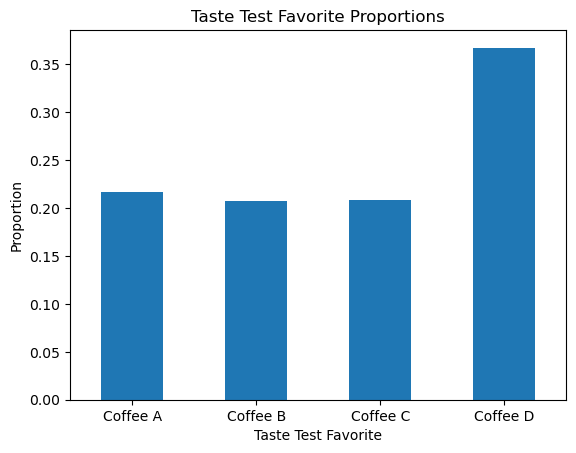

In [21]:
## get baseline model accuracy
(coffee_df.taste_test_favorite.value_counts()/coffee_df.shape[0])[['Coffee A','Coffee B', 'Coffee C','Coffee D']].plot(kind = 'bar',
                                                                                                                       xlabel = 'Taste Test Favorite',
                                                                                                                       ylabel = 'Proportion',
                                                                                                                       title = 'Taste Test Favorite Proportions')
plt.xticks(rotation=0)

## Initial Model

In [23]:
## train initial model
clf = tree.DecisionTreeClassifier(max_depth = 4)
clf.fit(train_x,train_y)

train_acc = np.mean(train_y == clf.predict(train_x))
test_acc = np.mean(test_y == clf.predict(test_x))

print(f"Train Accuracy: {int(100*train_acc)}%")
print(f"Test Accuracy: {int(100*test_acc)}%")

Train Accuracy: 44%
Test Accuracy: 42%


## Hyperparameter Tuning

(0.0, 1.0)

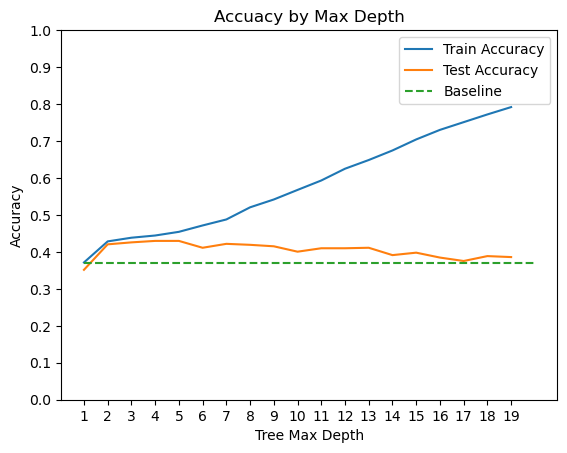

In [25]:
## hyperparameter tune max_depth 
hyperparameter_tuning_df = pd.DataFrame({
                                         'depth': [],
                                         'train_accuracy': [],
                                         'test_accuracy': []
                                        })

md = 20
depths = np.arange(1,md)
for depth in depths:
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf.fit(train_x,train_y)
    
    train_acc = np.mean(train_y == clf.predict(train_x))
    test_acc = np.mean(test_y == clf.predict(test_x))
    
    hyperparameter_tuning_df.loc[len(hyperparameter_tuning_df.index)] = [depth, train_acc, test_acc]

plt.plot(hyperparameter_tuning_df.depth, hyperparameter_tuning_df.train_accuracy, label = 'Train Accuracy')
plt.plot(hyperparameter_tuning_df.depth, hyperparameter_tuning_df.test_accuracy, label = 'Test Accuracy')
plt.plot([1,md],[0.37,0.37],label='Baseline',ls='--')
plt.xticks(np.arange(1,md))
plt.legend()
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel('Tree Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuacy by Max Depth')
plt.ylim(0,1)

## Final Model Performance

(0.4, 0.45)

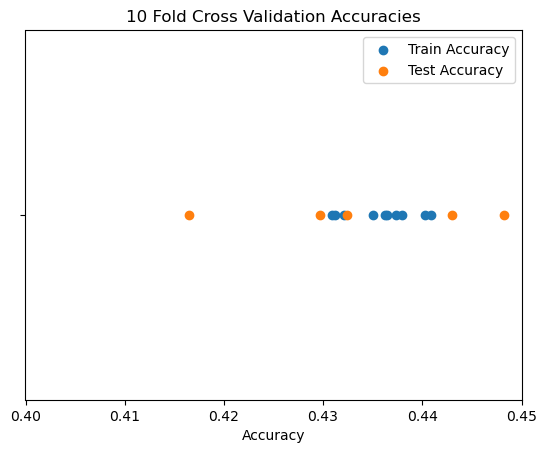

In [27]:
# 10 Fold Cross Validation
cvs=10

train_accs = []
test_accs = []

coffee_df = coffee_df.sample(frac=1)

for i in range(cvs):
    
    test_df = coffee_df[i*377:(i+1)*377]
    train_df = coffee_df.drop(test_df.index)
    
    train_x = train_df.drop('taste_test_favorite',axis=1)
    train_y = train_df.taste_test_favorite
    test_x = test_df.drop('taste_test_favorite',axis=1)
    test_y = test_df.taste_test_favorite
    
    clf = tree.DecisionTreeClassifier(max_depth = 3)
    clf.fit(train_x,train_y)
    
    train_acc = np.mean(train_y == clf.predict(train_x))
    test_acc = np.mean(test_y == clf.predict(test_x))
    
    train_accs = np.append(train_accs, train_acc)
    test_accs = np.append(test_accs, test_acc)

plt.scatter(train_accs,[1]*10,label = 'Train Accuracy')
plt.scatter(test_accs,[1]*10, label = 'Test Accuracy')
plt.title('10 Fold Cross Validation Accuracies')
plt.yticks([1],[''])
plt.xlabel('Accuracy')
plt.legend()
plt.xlim(0.4,0.45)

In [28]:
np.mean(test_accs)

0.4246684350132626

In [29]:
## feature importance
feature_importance_df = pd.DataFrame({'col':train_x.columns,
                                      'feature_importance':clf.feature_importances_
                                     })
feature_importance_df.sort_values('feature_importance',ascending=False).head(10)

,col,feature_importance
151,preffered_roast_Light,0.578322
142,liked_coffee_kind_Fruity,0.291027
144,liked_coffee_kind_Juicy,0.100449
244,know_orgin_Yes,0.019772
83,favorite_drink_Other,0.010430
163,"why_drink_I need the caffeine, It makes me go ...",0.000000
164,"why_drink_I need the caffeine, It makes me go ...",0.000000
165,"why_drink_I need the caffeine, It makes me go ...",0.000000
166,"why_drink_I need the caffeine, It makes me go ...",0.000000
167,"why_drink_I need the caffeine, It tastes good",0.000000


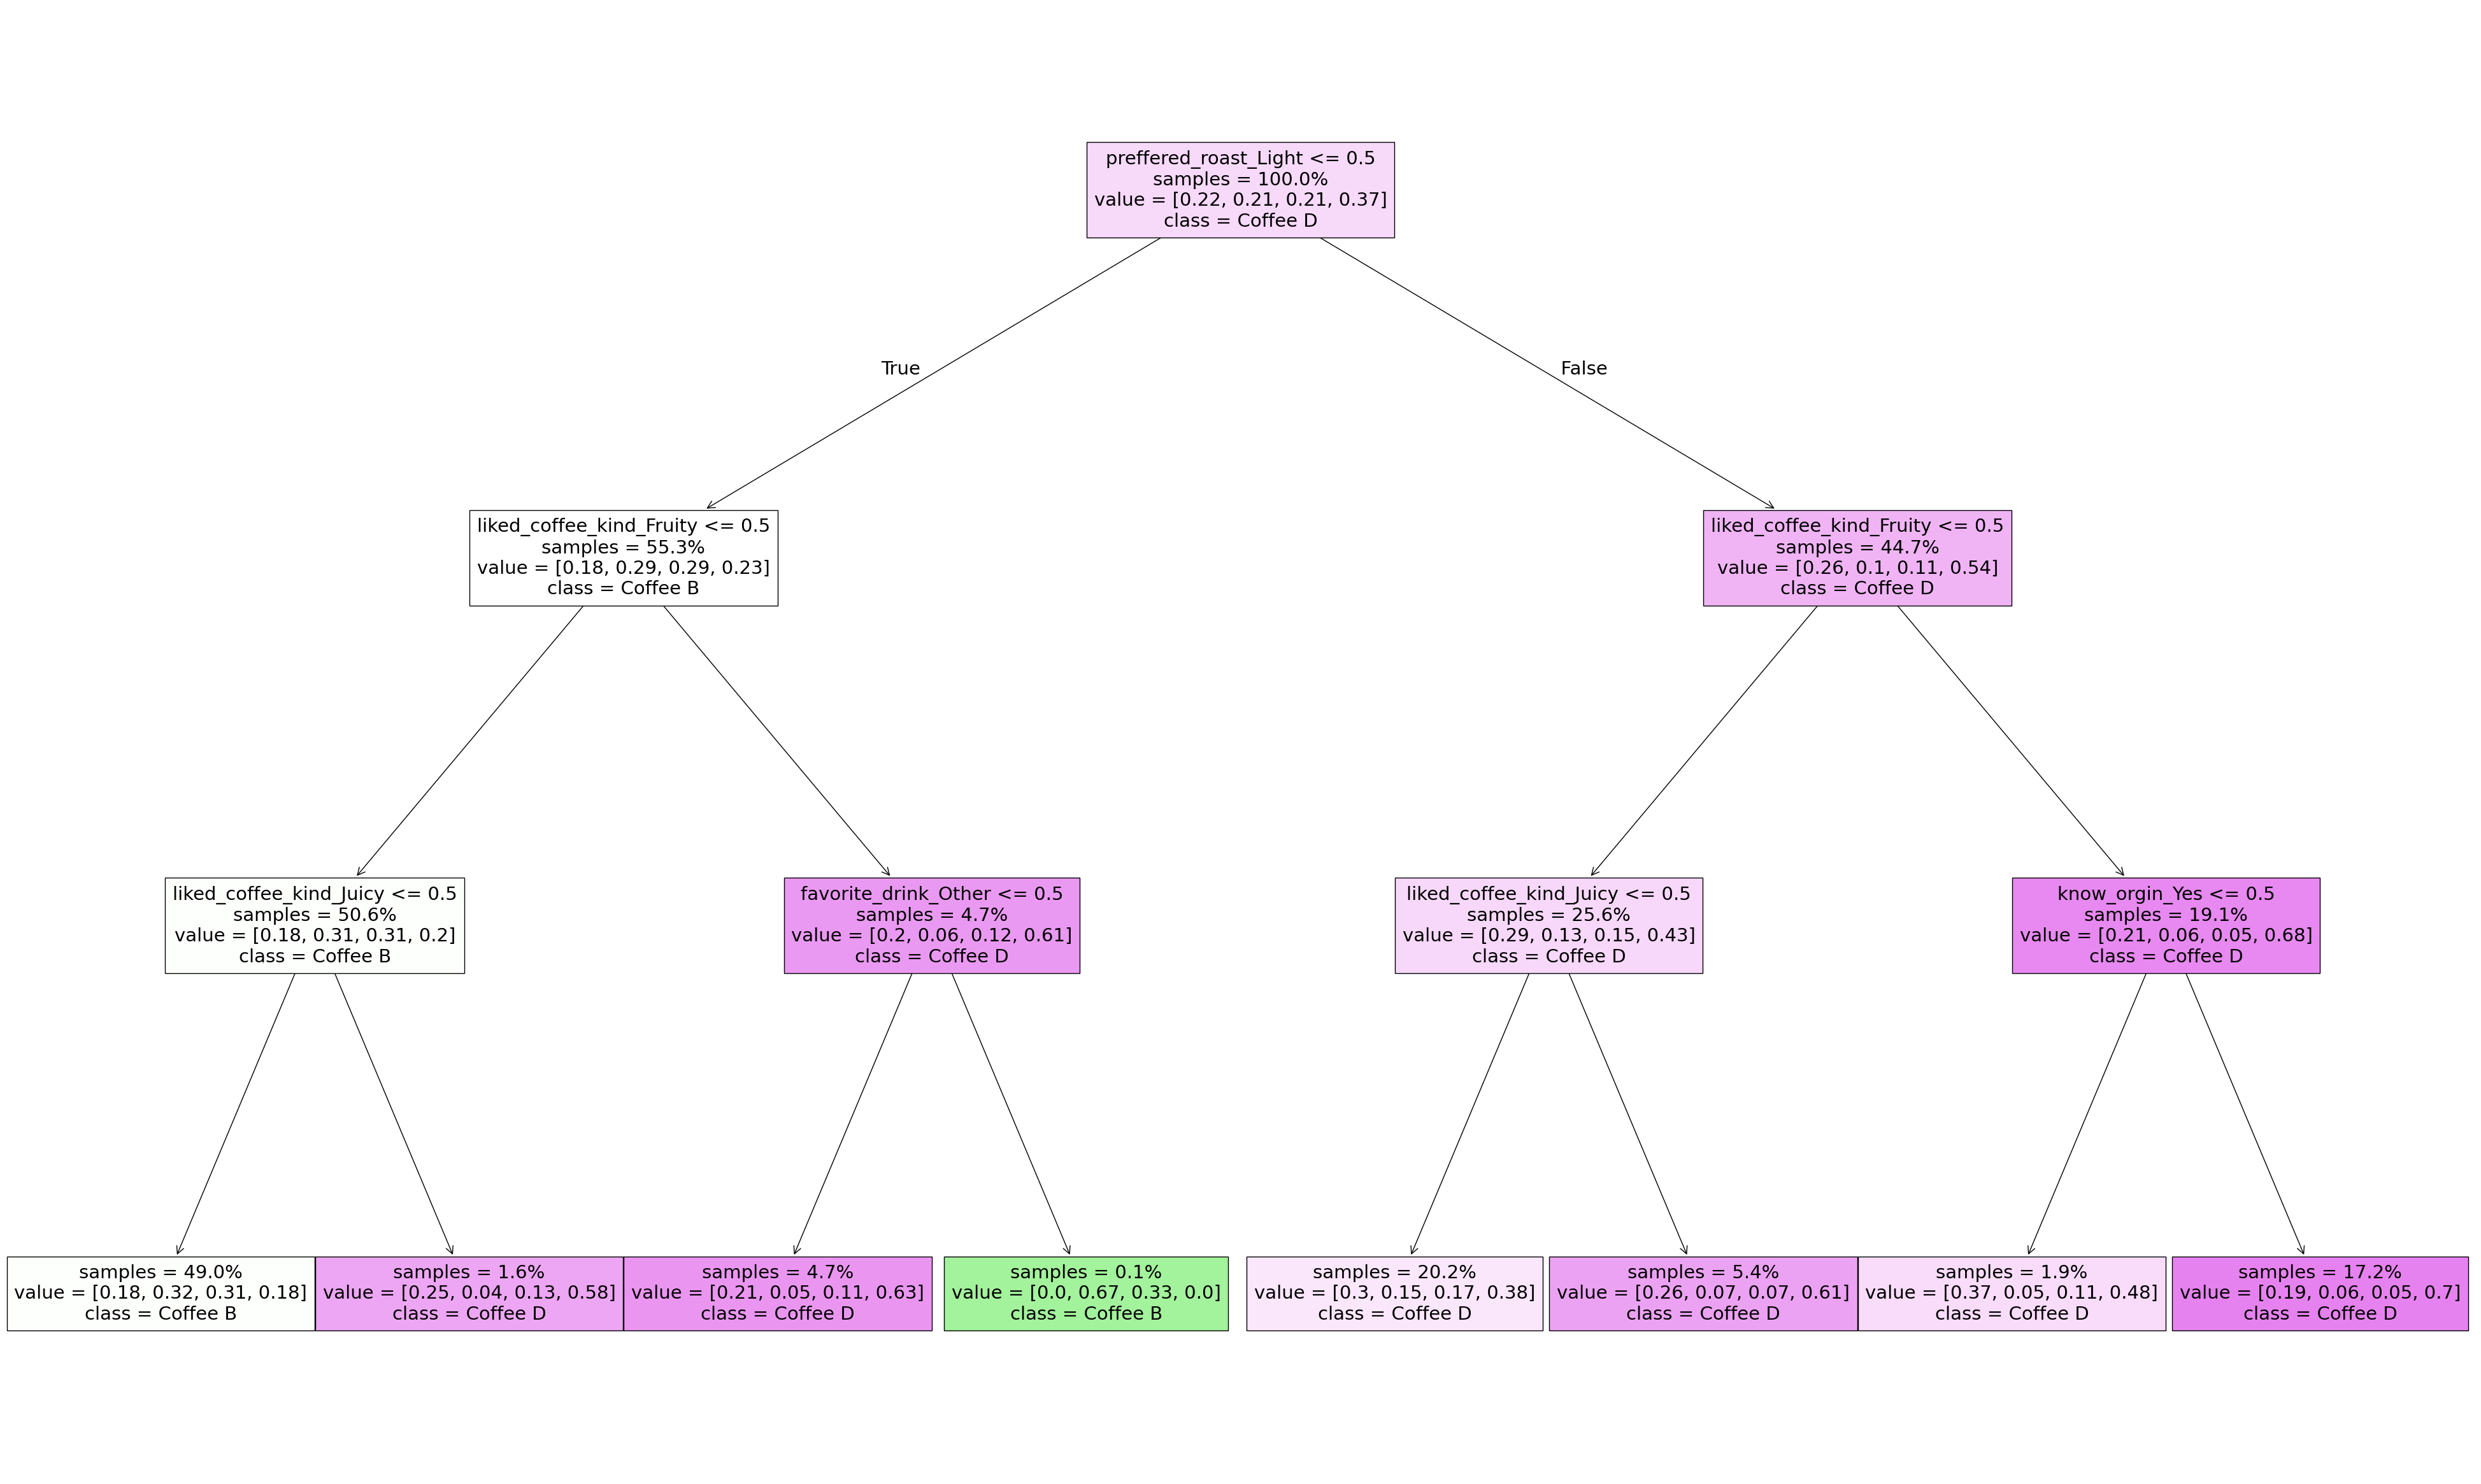

In [30]:
## tree plot
plt.figure(figsize=(50,30))
sk.tree.plot_tree(clf,
                  feature_names = train_x.columns,
                  class_names = clf.classes_,
                  filled = True,
                  impurity = False,
                  proportion = True,
                  precision = 2
                 )
plt.savefig('final_model_tree.png')